In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv('winequality-red.csv')
x= df.drop(columns='quality')
y=df['quality']

In [5]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=100)

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [16]:
df_bagg= BaggingClassifier( DecisionTreeClassifier(), n_estimators=10)  

In [17]:
df_bagg.fit(x_train,y_train)
df_bagg.predict(x_test)

array([6, 7, 5, 5, 7, 7, 5, 6, 6, 7, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 7, 7, 6, 5, 4, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 7, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 7, 5, 5, 5, 7, 6, 7, 7, 6, 5,
       5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 5, 6,
       6, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       5, 5, 7, 5, 6, 7, 5, 4, 6, 5, 6, 5, 6, 5, 7, 6, 7, 5, 5, 5, 6, 6,
       5, 6, 7, 6, 7, 7, 5, 7, 5, 5, 7, 6, 6, 5, 5, 5, 7, 5, 6, 5, 6, 6,
       7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 7, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 6, 5, 5, 7, 6, 5, 7, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 7, 5,

In [18]:
df_bagg.score(x_test,y_test)

0.6925

In [19]:
print(df_bagg.base_estimator)

DecisionTreeClassifier()


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
df_neighbour= BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [24]:
df_neighbour.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [25]:
df_neighbour.base_estimator

KNeighborsClassifier(n_neighbors=6)

In [26]:
df_neighbour.score(x_test,y_test)

0.48

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
df_random= RandomForestClassifier(n_estimators=5)

In [29]:
df_random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [30]:
df_random.score(x_test,y_test)

0.6475

In [31]:
df_random.estimators_  ##if you want to estimate with every single decision tree uses by random forest classifier

[DecisionTreeClassifier(max_features='auto', random_state=1135650006),
 DecisionTreeClassifier(max_features='auto', random_state=917665014),
 DecisionTreeClassifier(max_features='auto', random_state=1539458869),
 DecisionTreeClassifier(max_features='auto', random_state=393932714),
 DecisionTreeClassifier(max_features='auto', random_state=766271260)]

In [32]:
for i in df_random.estimators_:
    i.fit(x_train,y_train)
    print(i.score(x_test,y_test))

0.6025
0.5925
0.6125
0.5925
0.525


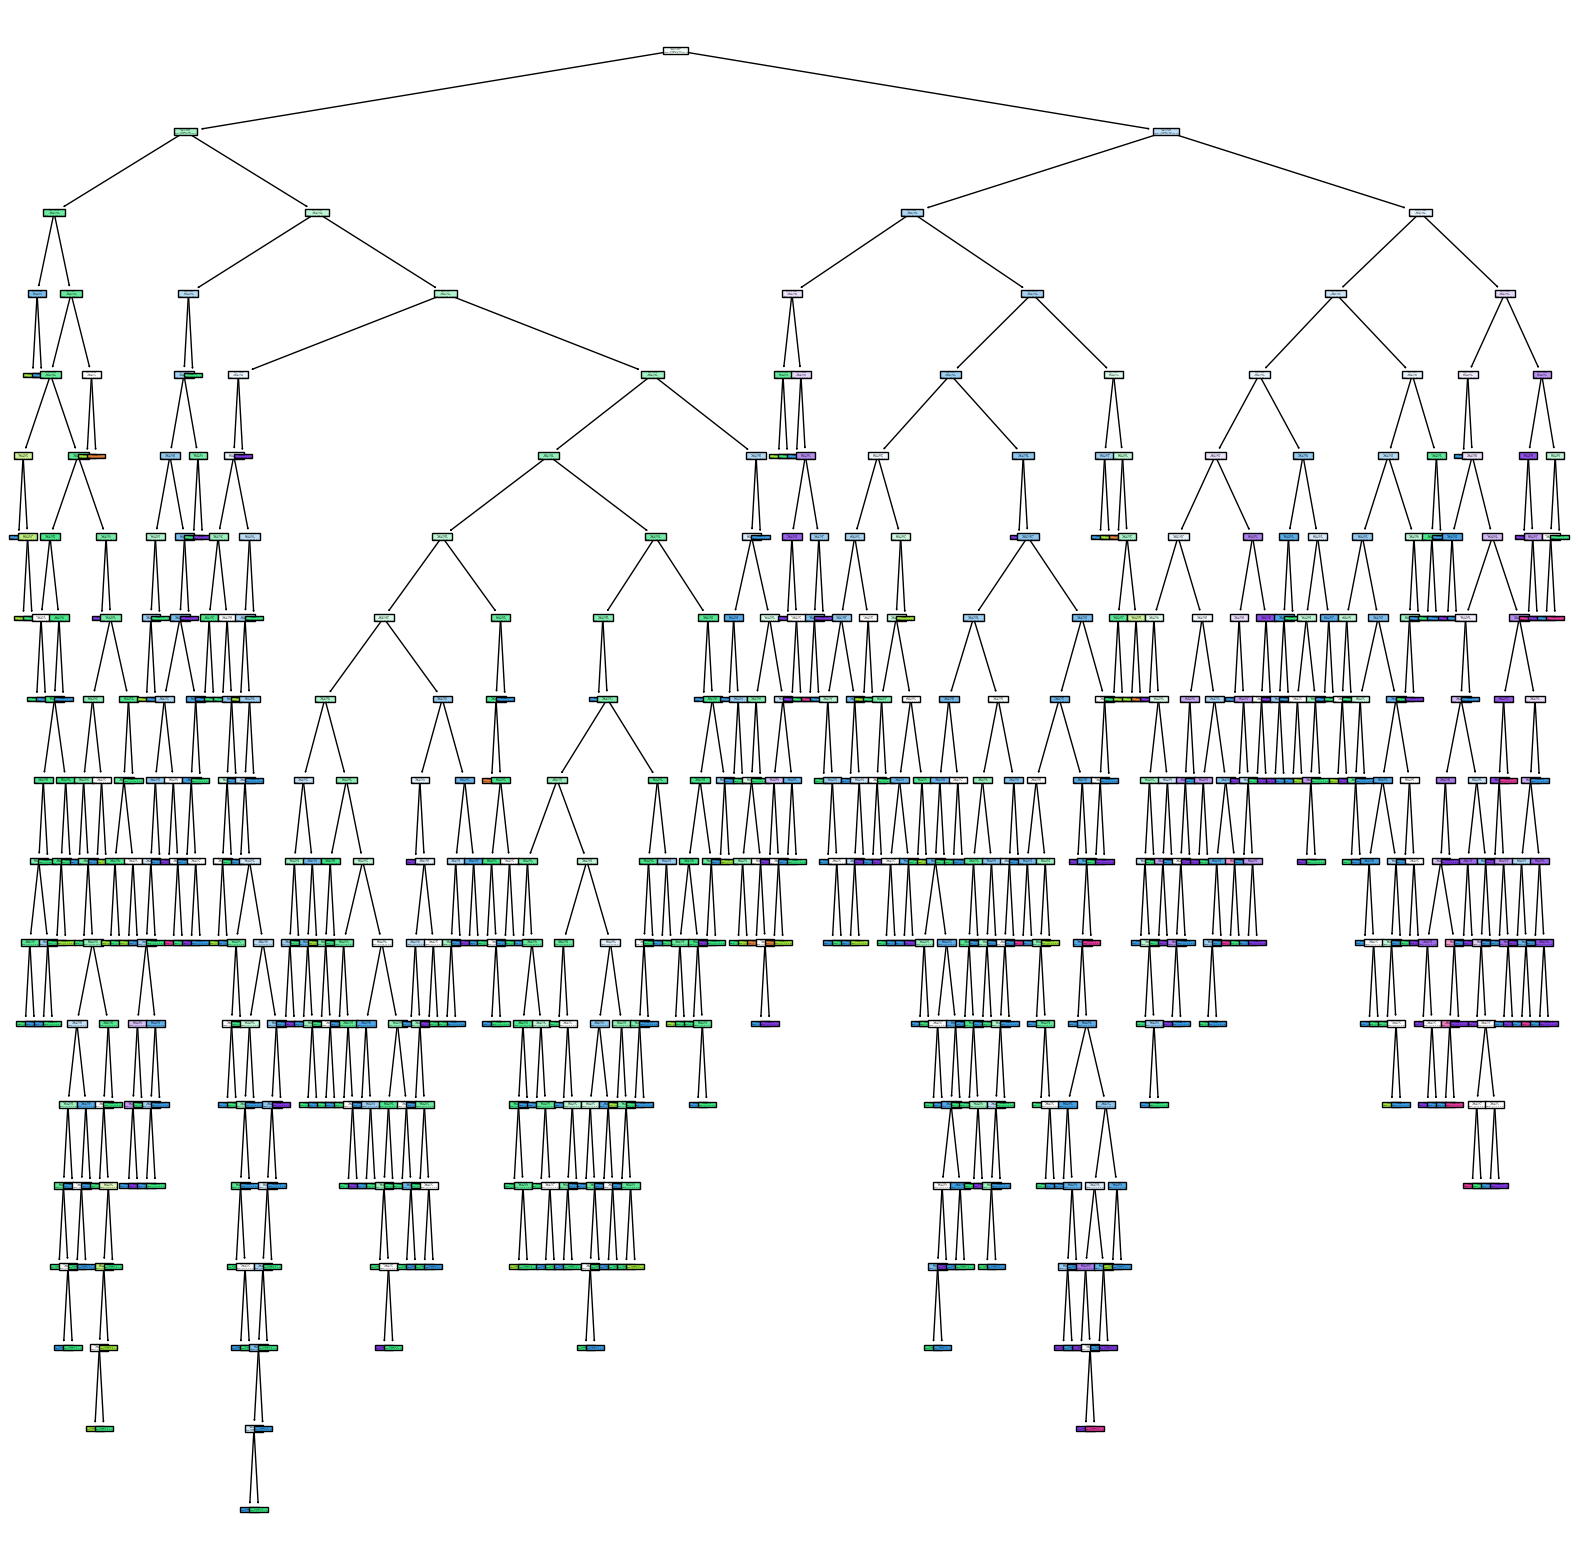

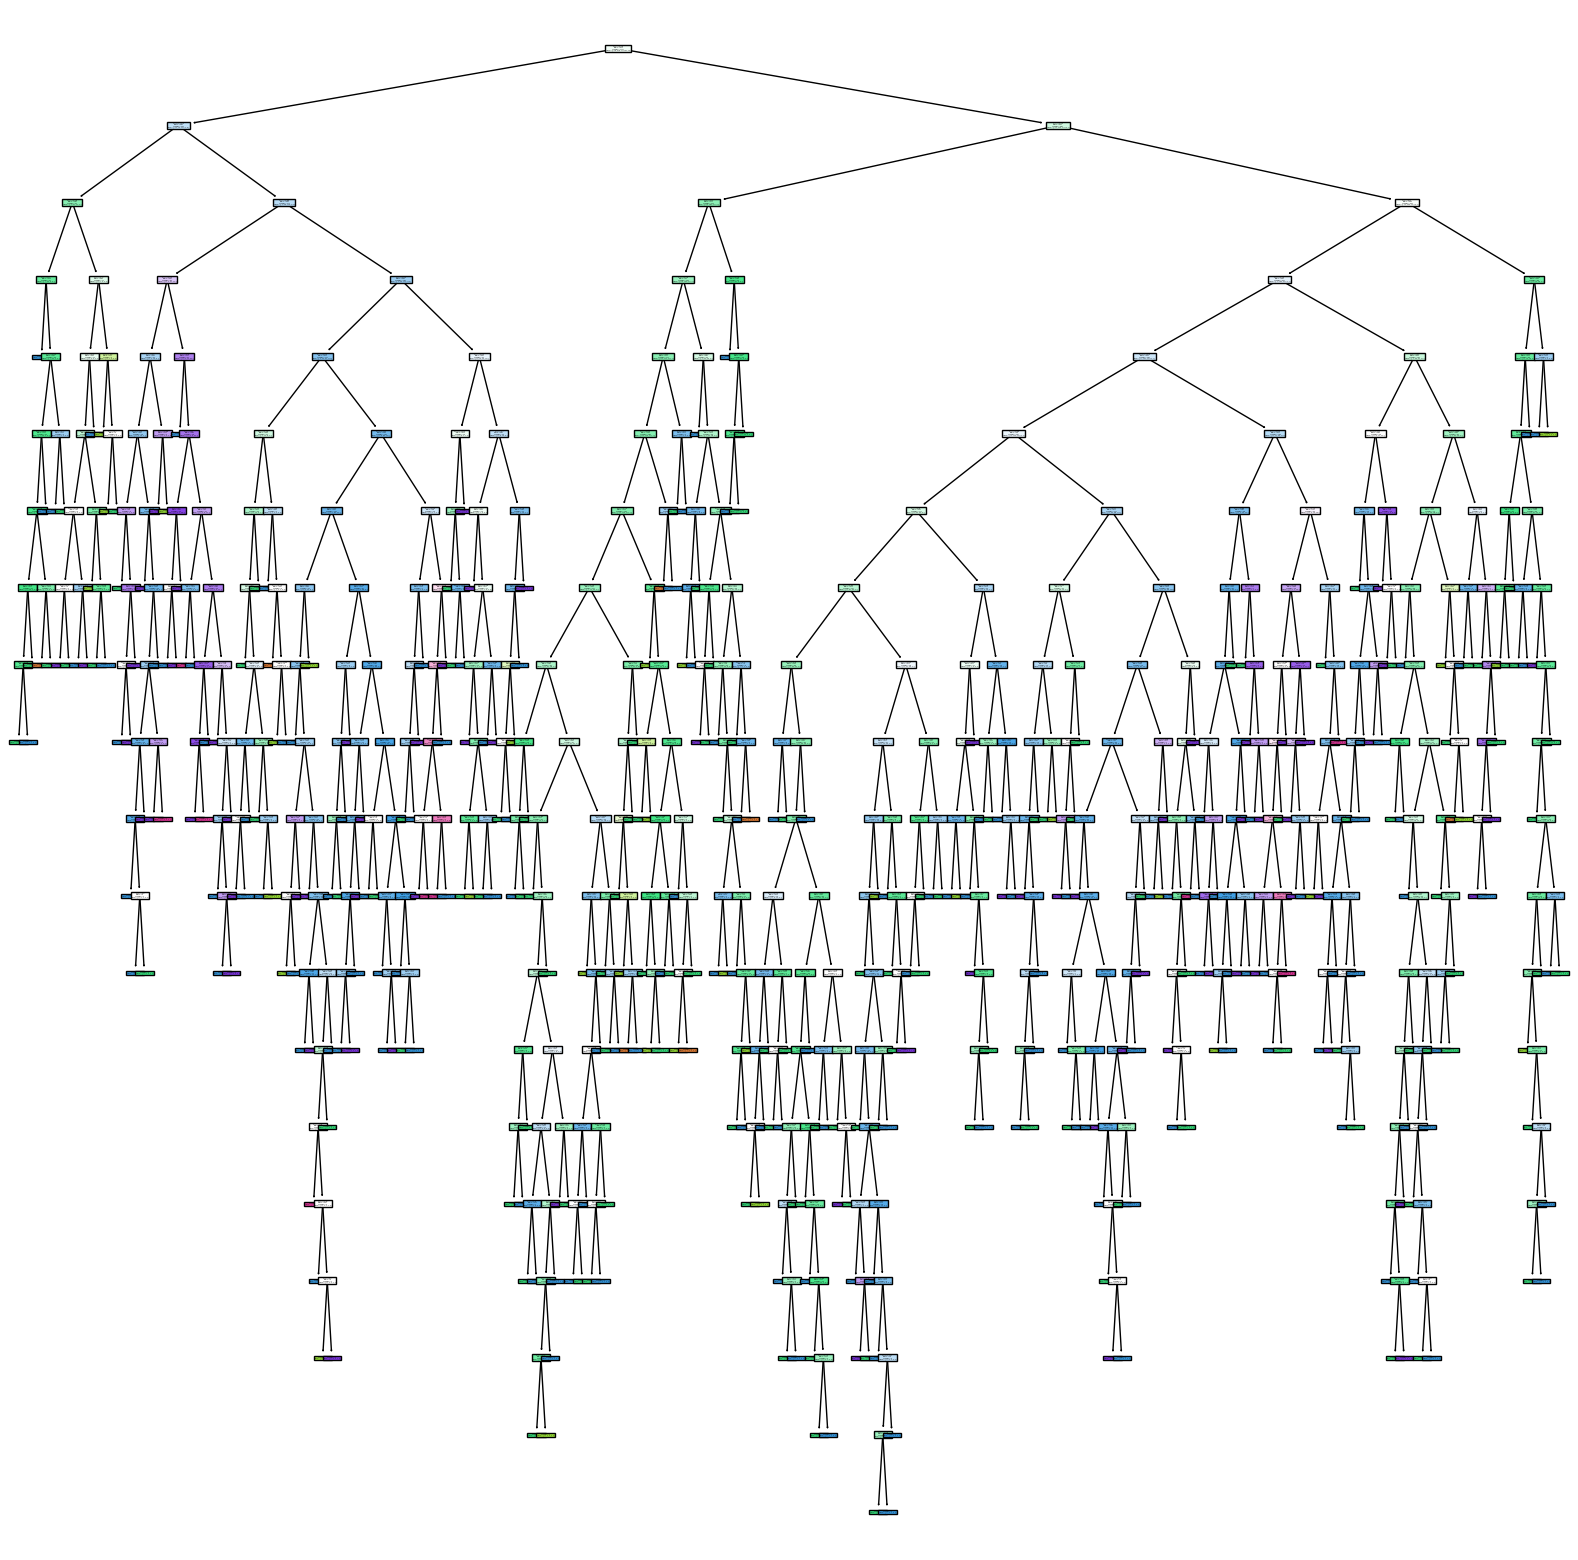

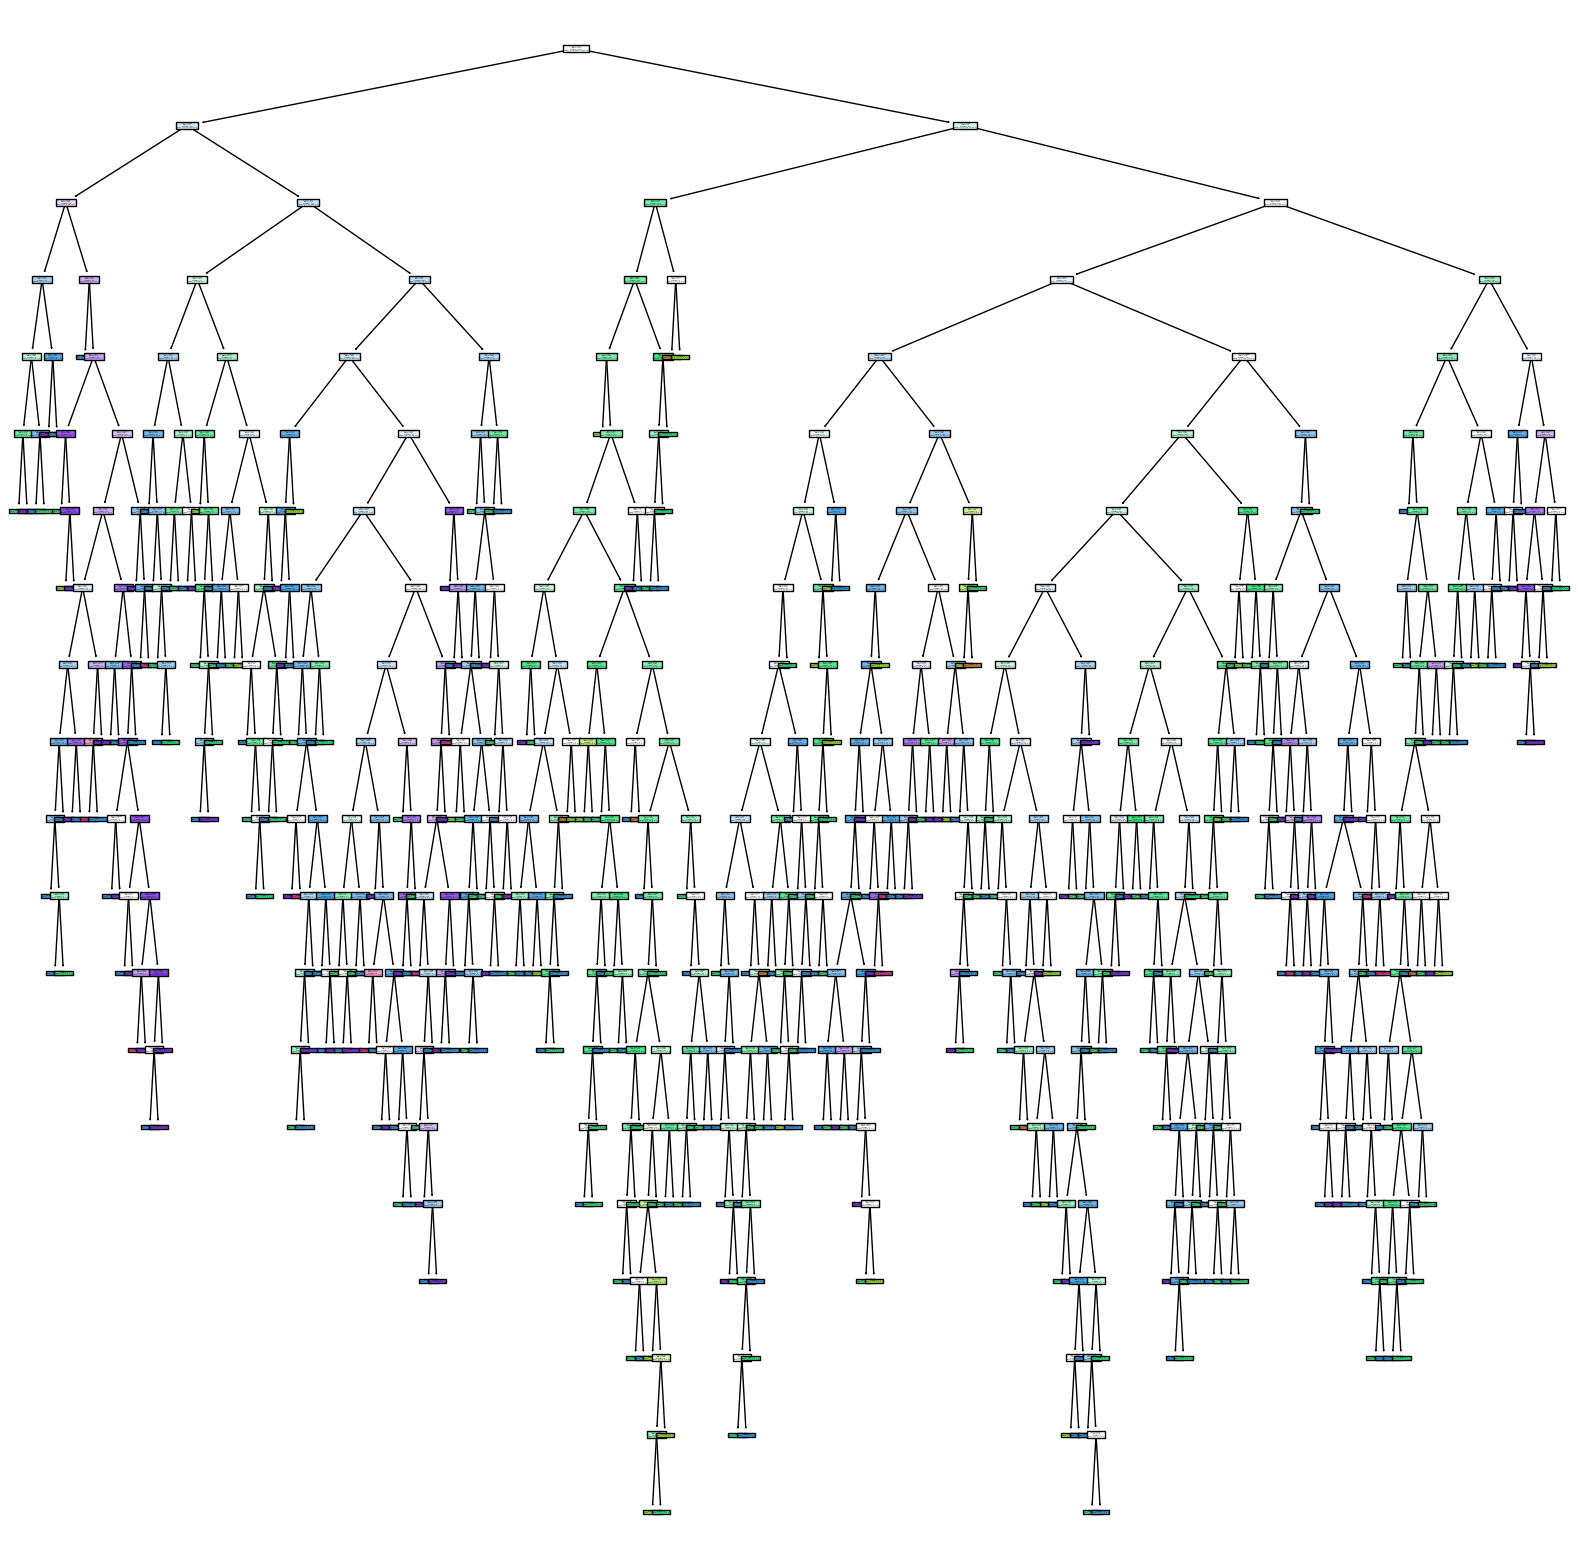

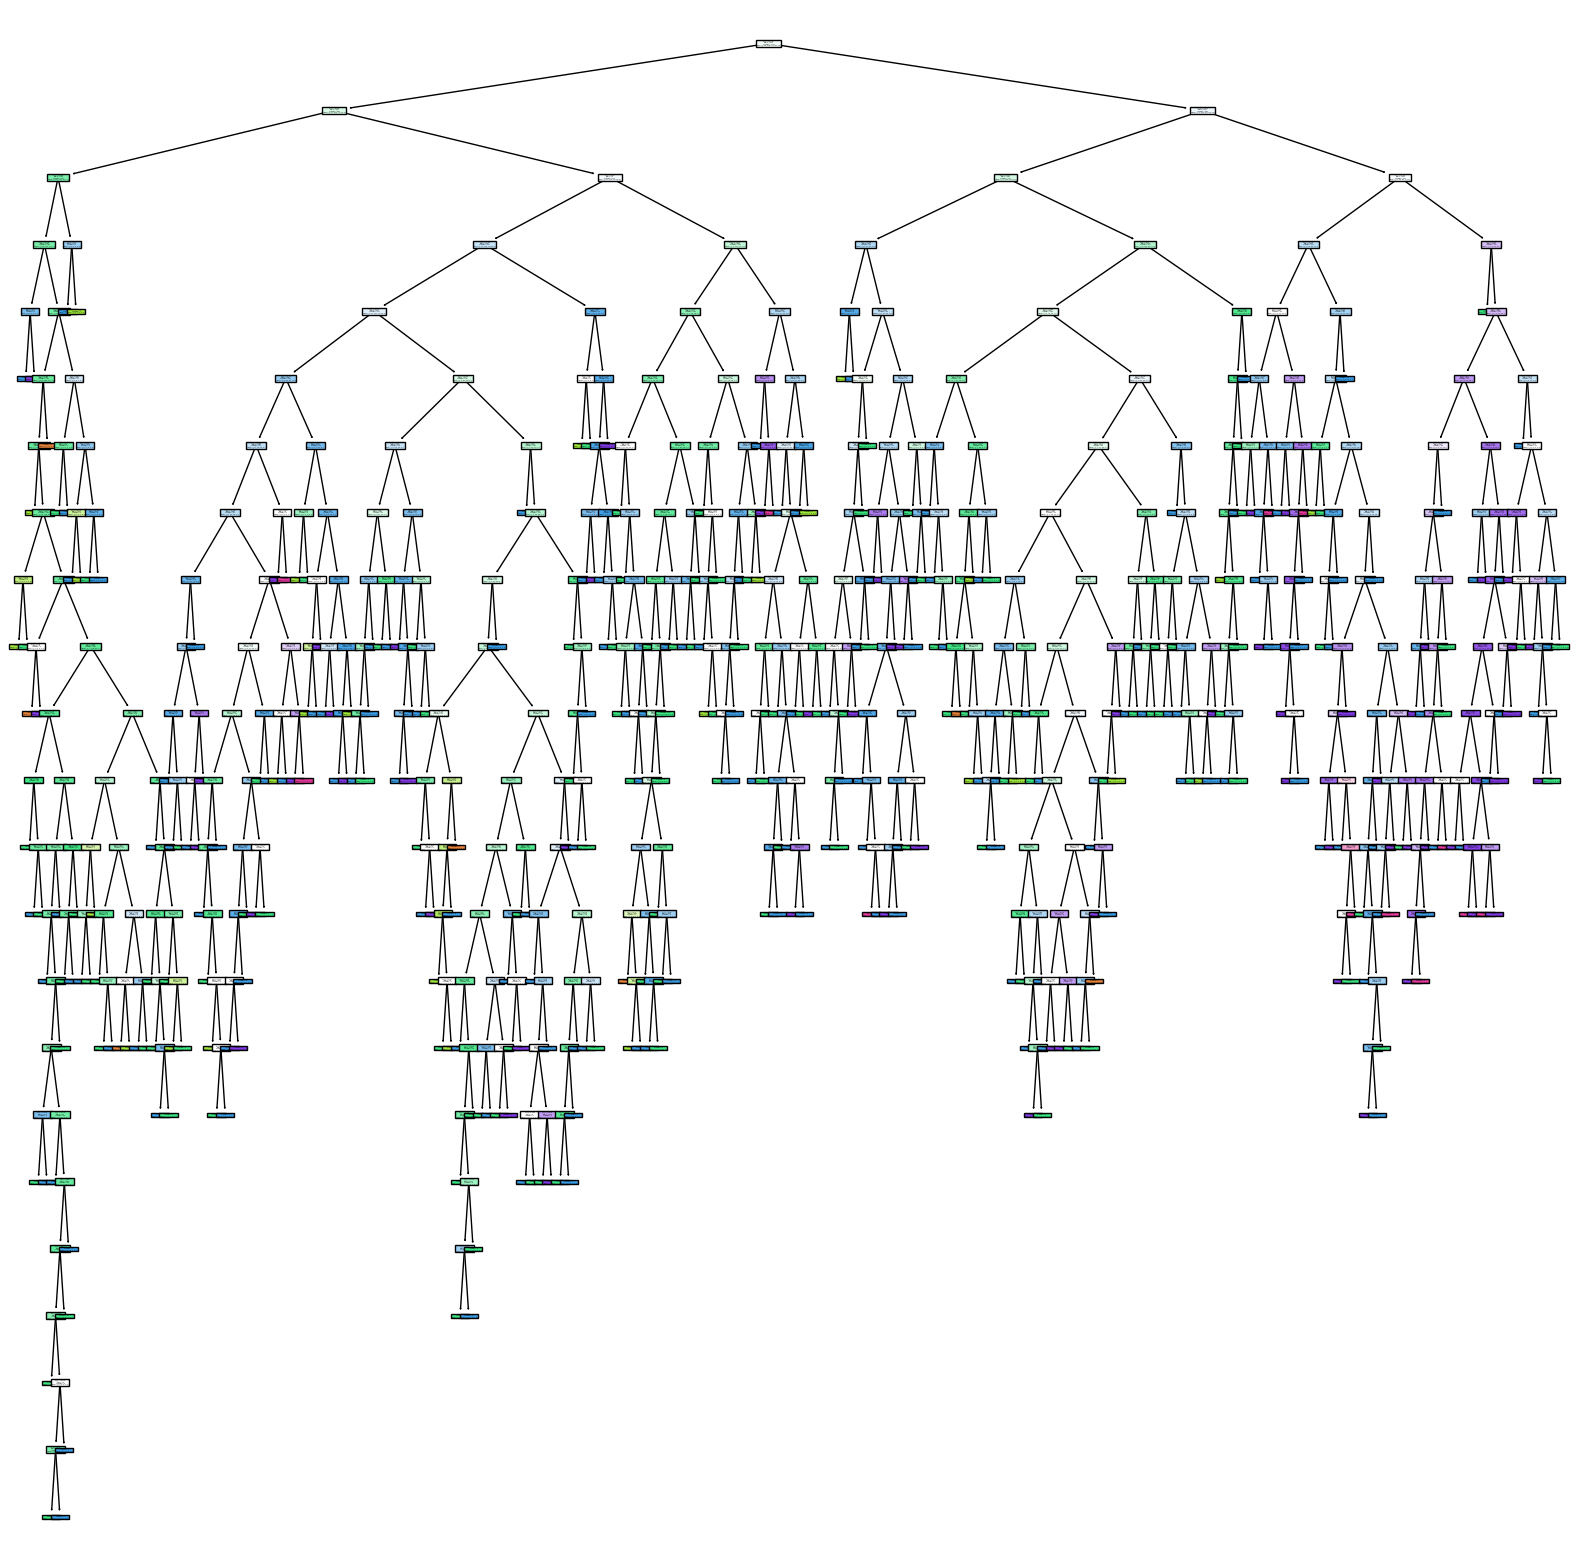

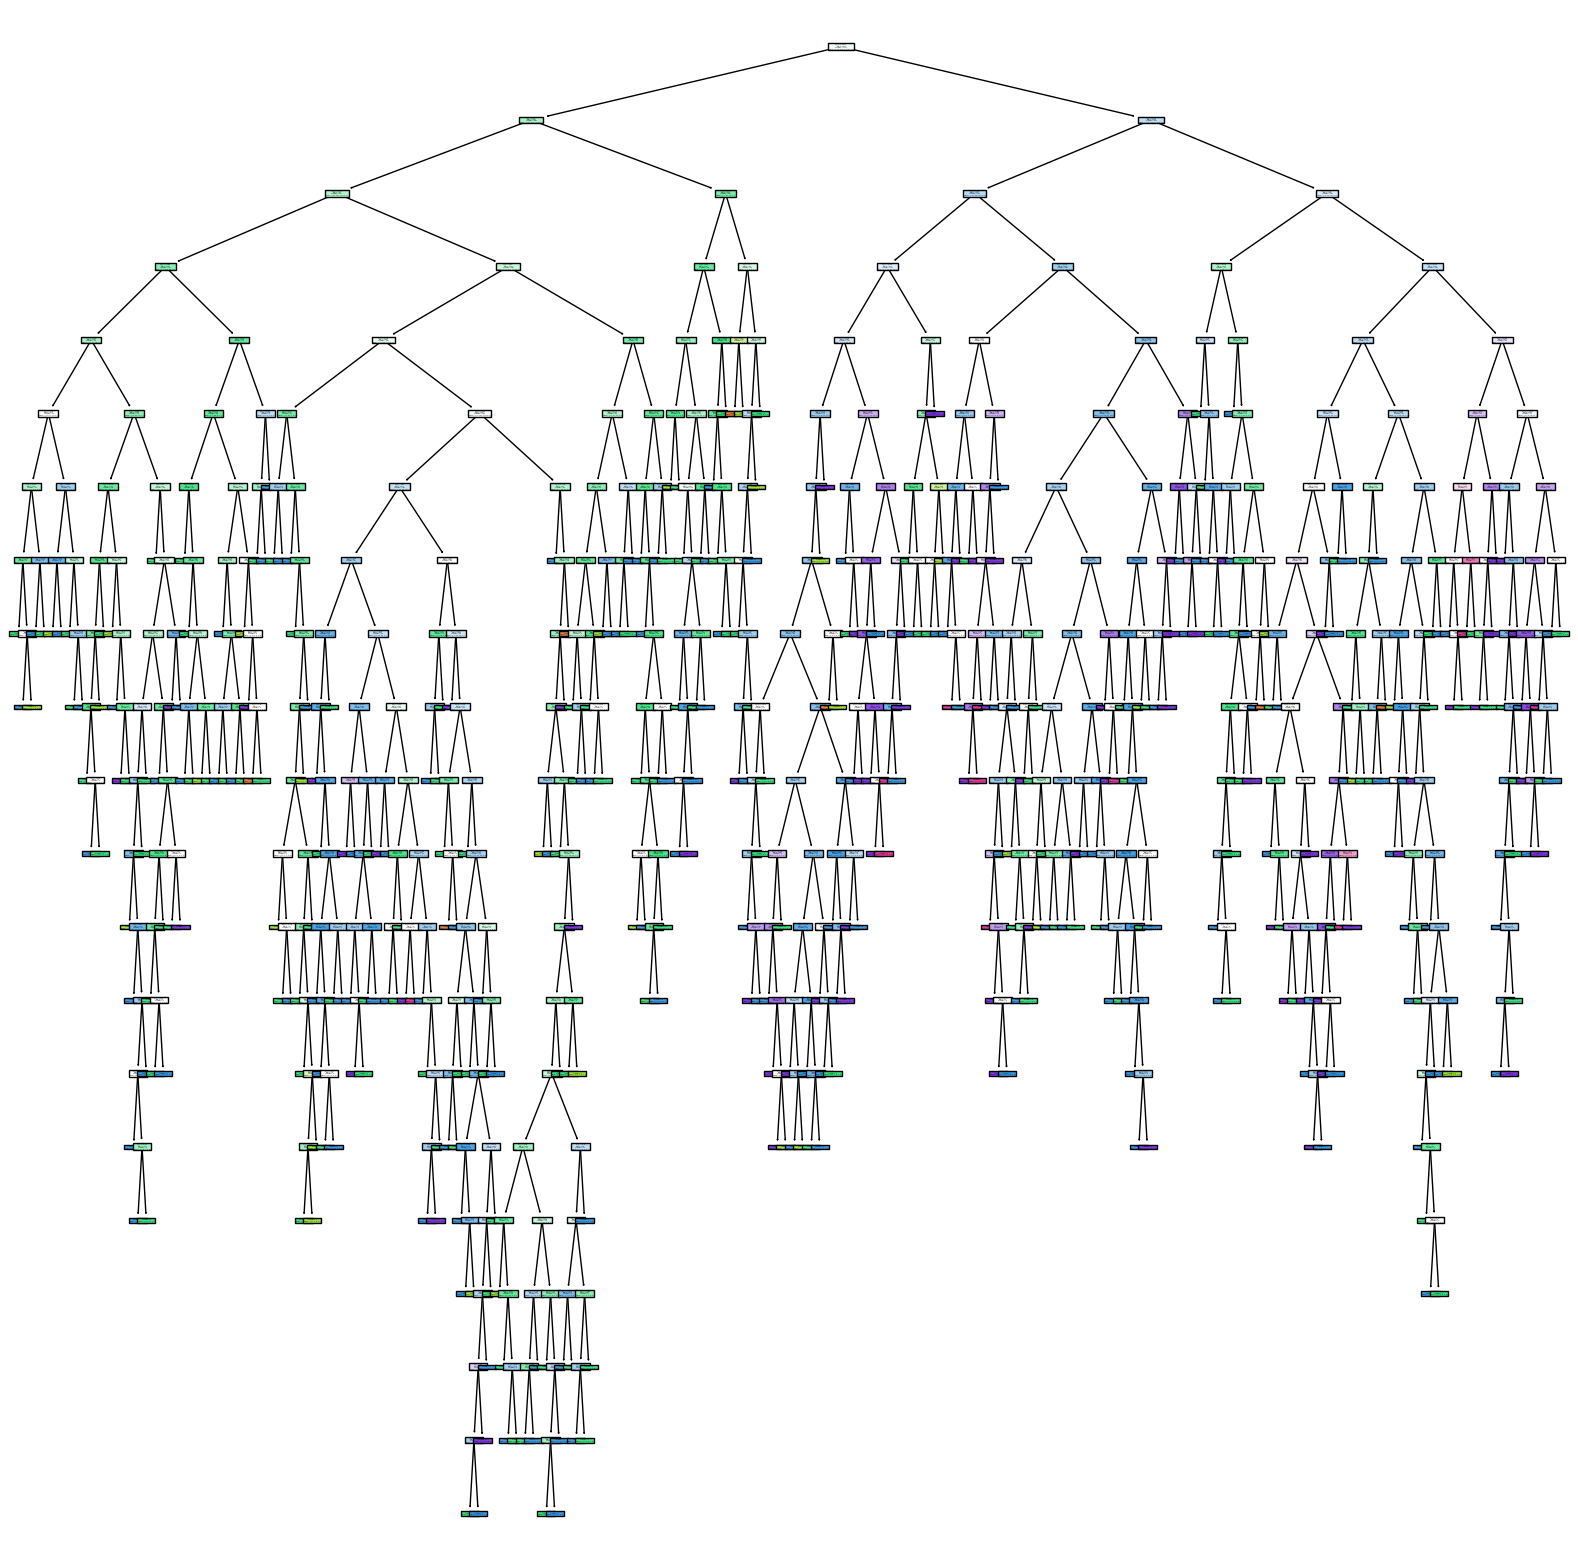

In [35]:
plt.figure(figsize= (20,20))
for i in df_random.estimators_:
    tree.plot_tree(i,filled=True)

# Now use GRIDSEARCH CV as used in Decision Trre Classifier to know which are the best values for Random Forest CLassifier 
Important- This is not done to increase the model accuracy but it is done so to stabilize your model

In [36]:
grid_param={
    'n_estimators':[5,10,15,20,25],
    'criterion':['gini', 'entropy'],
    'max_depth':range(10),
    'min_samples_leaf':range(10)
}

In [37]:
grid_search = GridSearchCV(param_grid= grid_param , estimator= df_random, cv=10 , n_jobs=10, verbose=1)

In [38]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1900 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Pa

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 20, 25]},
             verbose=1)

In [40]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 15}

In [42]:
df_best = RandomForestClassifier(criterion= 'entropy',
 max_depth=9,
 min_samples_leaf=2,
 n_estimators=15)

In [43]:
df_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       n_estimators=15)

In [44]:
df_best.score(x_test,y_test)

0.6725